In [2]:
import numpy 
import scipy  
import scipy.stats
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
df = pd.read_csv("EoS-insensitive_posterior_samples.dat", delimiter=' ', skiprows=1, names=["m1", "m2", "lambda1", "lambda2", "r1", "r2"])
df

,m1,m2,lambda1,lambda2,r1,r2
0,1.543236,1.205749,97.068200,248.541197,10.730811,9.358211
1,1.482590,1.253115,19.677667,280.480973,8.186003,9.833989
2,1.541613,1.206940,31.524739,235.511540,9.149591,9.373914
3,1.562878,1.191476,49.572338,409.681755,9.951128,10.102846
4,1.656298,1.128266,27.441288,246.930128,9.602853,9.395534
...,...,...,...,...,...,...
2916,1.508332,1.232504,91.421409,229.584025,10.730333,9.901073
2917,1.602577,1.163587,59.820623,266.473512,10.058355,9.314710
2918,1.561251,1.192543,12.951990,234.310549,8.475787,9.328835
2919,1.476021,1.258401,126.699863,346.595638,10.741590,10.844589


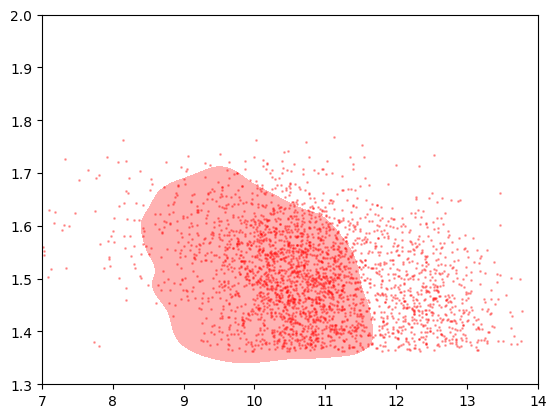

In [69]:
alpha = 10
n = 300

r = numpy.array(df.r1)
m = numpy.array(df.m1)

dist = numpy.vstack((r, m))

pdf1 = scipy.stats.gaussian_kde(dist)

q, w = numpy.meshgrid(numpy.linspace(8, 14.0, n), numpy.linspace(1.3, 2.0, n))
rel = pdf1([q.flatten(), w.flatten()])

s1 = scipy.stats.scoreatpercentile(pdf1(pdf1.resample(1000)), alpha)

x = numpy.linspace(8.0, 12.0, n)
y = numpy.linspace(1.3, 2.0, n)
z = numpy.reshape(rel, (n, n))

plt.xlim([7, 14])
plt.contourf(x, y, z, [s1, 1000.0], colors='r', alpha=0.3)

plt.scatter(r, m, c='r', alpha=0.3, s=1.0)
